In [86]:
import pandas as pd
import numpy as np



In [87]:
def buildPostsToPrice(df_posts,df_price,name):
    data=[]
    for date in df_posts['created'].unique():
        datum = date
        anzahl = df_posts[df_posts['created']==date].count().created
        sentiment = round(np.mean(df_posts[df_posts['created']==date]['Sentiment']),3)
        kurs = df_price[df_price['Date']==date]['High'].values[0]
        data.append([datum,anzahl,sentiment,kurs])

    df_BTC_posts_price = pd.DataFrame(data,columns=['Datum','AnzahlPosts','Sentiment','Kurs'])
    df_BTC_posts_price.to_csv("postsToPrice/"+name+".csv")

def lineareRegression(coin):
    df = pd.read_csv('postsToPrice/'+coin+'.csv',index_col=0)
    data = df[['AnzahlPosts','Kurs']]

    matrix = np.array(data.values)


    X = matrix[:,0]
    y = matrix[:,1]

    X = X/(np.max(X))

    model = np.polyfit(X,y,1)

    predict = np.poly1d(model)
    print(coin+": R2-Score:"+str(r2_score(y,predict(X))))

    x_lin_reg = np.arange(0,1,0.1)
    y_lin_reg = predict(x_lin_reg)
    plt.title(coin)
    plt.scatter(X,y)
    plt.plot(x_lin_reg,y_lin_reg,c='r')

In [88]:
df = pd.read_csv("redditdaten.csv")

coins = ['BTC','ETH','AVAX','SHIB']

for coin in coins:
    df_coin = df[df[coin]]
    df_coin_price = pd.read_csv("financeData/"+coin+"-USD.csv")
    buildPostsToPrice(df_coin,df_coin_price,coin)


In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

BTC: R2-Score:0.01975476184699021


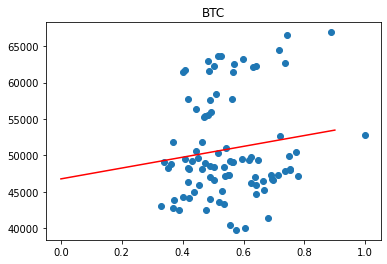

In [90]:
lineareRegression(coins[0])

ETH: R2-Score:0.020080783967807436


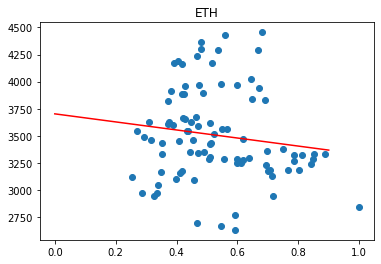

In [91]:
lineareRegression(coins[1])

AVAX: R2-Score:0.15721439203994003


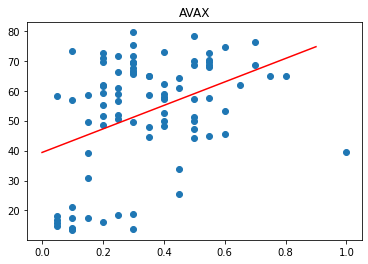

In [92]:
lineareRegression(coins[2])

SHIB: R2-Score:0.8263658985525579


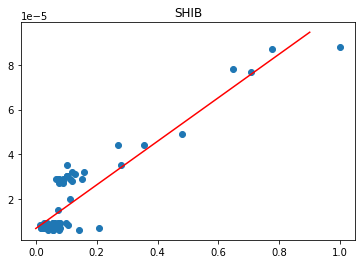

In [93]:
lineareRegression(coins[3])